In [1]:
import pandas as pd

# Load the data
player_data = pd.read_csv('./data/players.csv')
salary_data = pd.read_csv('./data/salaries_1985to2018.csv')

In [2]:
player_data.head()

,index,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [3]:
player_data.columns

Index(['index', '_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight'],
      dtype='object')

In [4]:
salary_data.head()

,index,league,player_id,salary,season,season_end,season_start,team
0,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [5]:
salary_data.columns

Index(['index', 'league', 'player_id', 'salary', 'season', 'season_end',
       'season_start', 'team'],
      dtype='object')

In [6]:
# Combine the data based on player_id and _id
combined_data = pd.merge(player_data, salary_data, left_on='_id', right_on='player_id')

combined_data.head()

,index_x,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,shoots,weight,index_y,league,player_id,salary,season,season_end,season_start,team
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [ ]:
# Get highest season end
highest_season_end = salary_data['season_end'].max()
highest_season_end

1985

In [9]:
# Filter the data to only season_end > 2010
recent_data = combined_data[combined_data['season_end'] > 2010]

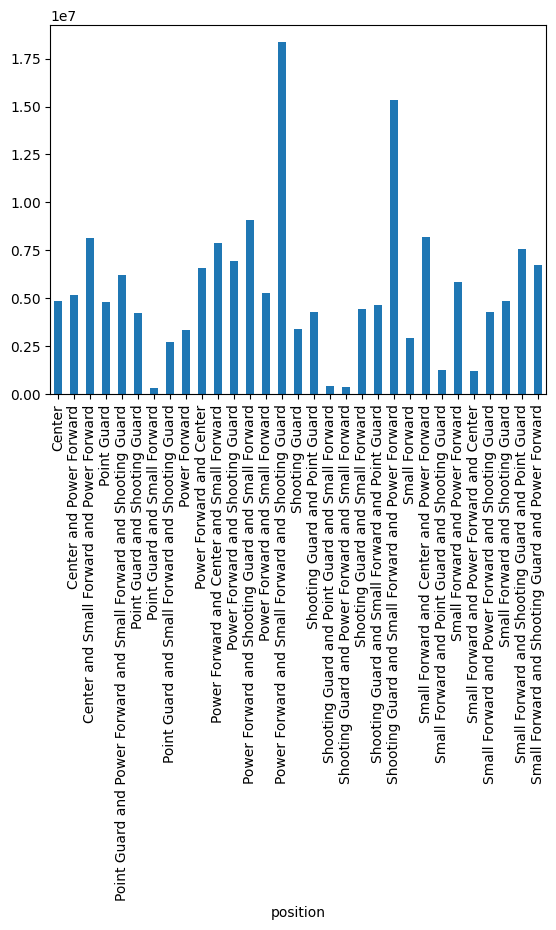

In [10]:
# Show the average salary for each position in graph
import matplotlib.pyplot as plt

recent_data.groupby('position')['salary'].mean().plot(kind='bar')
plt.show()

<Axes: xlabel='position'>

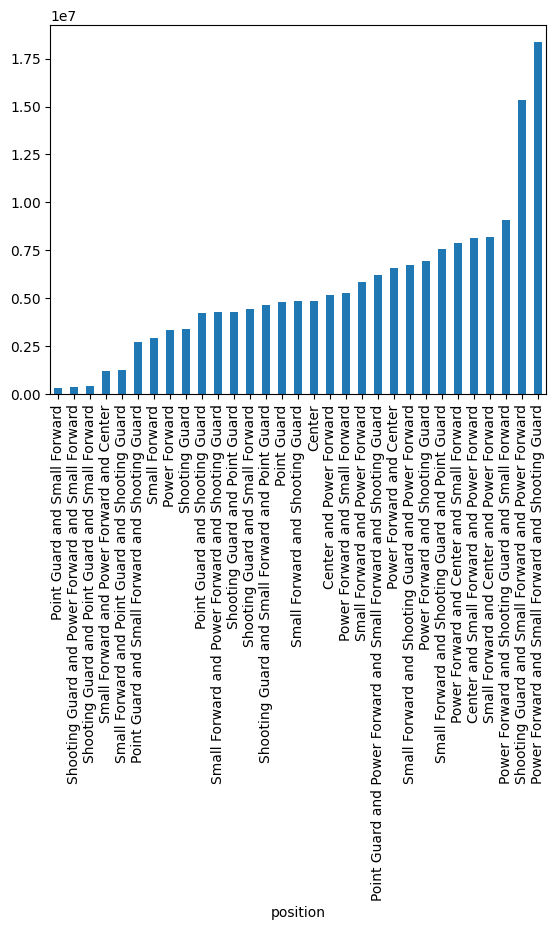

In [11]:
# Show the average salary for each position, sorted
recent_data.groupby('position')['salary'].mean().sort_values().plot(kind='bar')

In [12]:
# Show the average salary for each position list
print(recent_data.groupby('position')['salary'].mean().sort_values())

position
Point Guard and Small Forward                                         3.216520e+05
Shooting Guard and Power Forward and Small Forward                    3.931976e+05
Shooting Guard and Point Guard and Small Forward                      4.144430e+05
Small Forward and Power Forward and Center                            1.206738e+06
Small Forward and Point Guard and Shooting Guard                      1.256484e+06
Point Guard and Small Forward and Shooting Guard                      2.714114e+06
Small Forward                                                         2.936045e+06
Power Forward                                                         3.330337e+06
Shooting Guard                                                        3.425926e+06
Point Guard and Shooting Guard                                        4.241516e+06
Small Forward and Power Forward and Shooting Guard                    4.298689e+06
Shooting Guard and Point Guard                                        4.304516

In [13]:
career_earnings = salary_data[["player_id", "salary"]].groupby("player_id").sum()
career_earnings.head()

,salary
player_id,
abdelal01,2844000
abdulka01,8560000
abdulma02,19849500
abdulta01,37982800
abdursh01,95866000


In [14]:
career_player_data = player_data.join(career_earnings, on="_id")
career_player_data["draft_pick"].head()

0    25th overall
1     5th overall
2     1st overall
3     3rd overall
4    11th overall
Name: draft_pick, dtype: object

In [15]:
career_player_data["draft_pick_num"] = career_player_data["draft_pick"].replace(r"\D+", "", regex=True)
career_player_data["draft_pick_num"] = pd.to_numeric(career_player_data["draft_pick_num"])
career_player_data["draft_pick_num"].head()

0    25.0
1     5.0
2     1.0
3     3.0
4    11.0
Name: draft_pick_num, dtype: float64

In [16]:
# Create column if player position was "Power Forward and Small Forward and Shooting Guard"
career_player_data["is_combo_position"] = career_player_data["position"] == ("Power Forward and Small Forward and Shooting Guard")
career_player_data["is_combo_position"].head()

0    False
1    False
2    False
3    False
4    False
Name: is_combo_position, dtype: bool

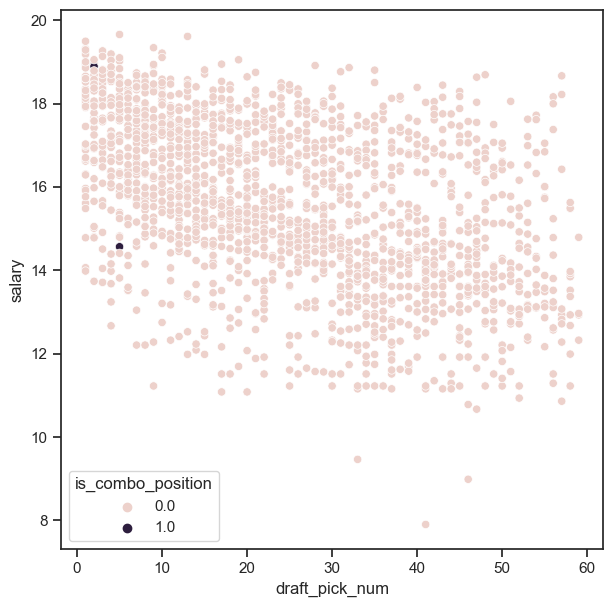

In [17]:
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))
# Color by if they are "Power Forward and Small Forward and Shooting Guard"
sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"] < 60]["draft_pick_num"], y = np.log(career_player_data["salary"]), hue = career_player_data[career_player_data["draft_pick_num"] < 60]["is_combo_position"])

plt.show()

In [18]:
# Make a column for each position they played
career_player_data["is_power_forward"] = career_player_data["position"].str.contains("Power Forward")
career_player_data["is_small_forward"] = career_player_data["position"].str.contains("Small Forward")
career_player_data["is_shooting_guard"] = career_player_data["position"].str.contains("Shooting Guard")
career_player_data["is_center"] = career_player_data["position"].str.contains("Center")
career_player_data["is_point_guard"] = career_player_data["position"].str.contains("Point Guard")


In [19]:
career_player_data[["name", "position", "is_power_forward", "is_small_forward", "is_shooting_guard", "is_center", "is_point_guard"]].head()

,name,position,is_power_forward,is_small_forward,is_shooting_guard,is_center,is_point_guard
0,Alaa Abdelnaby,Power Forward,True,False,False,False,False
1,Zaid Abdul-Aziz,Power Forward and Center,True,False,False,True,False
2,Kareem Abdul-Jabbar,Center,False,False,False,True,False
3,Mahmoud Abdul-Rauf,Point Guard,False,False,False,False,True
4,Tariq Abdul-Wahad,Shooting Guard,False,False,True,False,False


In [20]:
# find players who are power forward, small forward, and shooting guards

career_player_data[(career_player_data["is_power_forward"] & career_player_data["is_small_forward"] & career_player_data["is_shooting_guard"])]

,index,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,shoots,weight,salary,draft_pick_num,is_combo_position,is_power_forward,is_small_forward,is_shooting_guard,is_center,is_point_guard
110,110,antetgi01,"December 6, 1994","Athens, Greece",4.1,52.1,27.7,74.2,465,21.9,...,Right,242lb,31087051.0,15.0,False,True,True,True,False,True
417,417,bowenry01,"November 20, 1975","Fort Madison, Iowa",0.5,45.6,20.6,69.3,507,10.5,...,Right,215lb,8895707.0,55.0,False,True,True,True,False,False
704,704,chandwi01,"May 10, 1987","Benton Harbor, Michigan",1.8,44.4,34.3,76.8,641,13.0,...,Right,225lb,58400387.0,23.0,False,True,True,True,False,False
1105,1105,dudleja01,"July 10, 1985","San Diego, California",1.6,46.5,39.2,73.2,847,12.7,...,Right,237lb,47538028.0,22.0,False,True,True,True,False,False
1119,1119,dunlemi02,"September 15, 1980","Fort Worth, Texas",2.2,44.1,37.7,80.3,986,13.9,...,Right,230lb,84513176.0,3.0,False,True,True,True,False,False
1124,1124,duranke01,"September 29, 1988","Washington, District of Columbia",4.1,49.3,38.1,88.3,849,25.2,...,Right,240lb,160209018.0,2.0,True,True,True,True,False,False
1392,1392,gallida01,"August 8, 1988","Sant'Angelo Lodigiano, Italy",2.0,42.5,37.6,87.1,549,16.9,...,Right,225lb,93507676.0,6.0,False,True,True,True,False,False
2003,2003,jacksst02,"April 5, 1978","Houston, Texas",3.1,41.4,33.3,79.8,858,14.3,...,Right,218lb,68627254.0,42.0,False,True,True,True,False,False
2019,2019,jamesle01,"December 30, 1984","Akron, Ohio",7.2,50.4,34.3,73.6,1198,27.6,...,Right,250lb,237020472.0,1.0,False,True,True,True,False,False
2160,2160,jonesju01,"February 10, 1979","Cocoa, Florida",0.9,42.4,34.9,70.4,471,12.5,...,Right,218lb,9686693.0,27.0,False,True,True,True,False,False


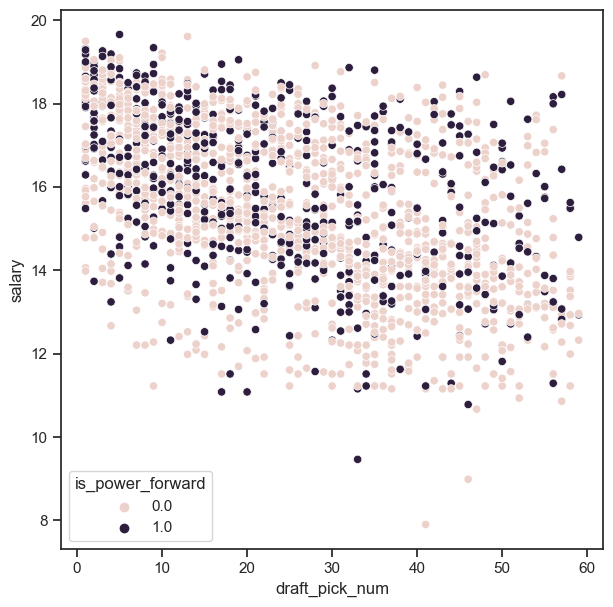

In [33]:
sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))

sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"] < 60]["draft_pick_num"], y = np.log(career_player_data["salary"]), hue = career_player_data[career_player_data["draft_pick_num"] < 60]["is_power_forward"])
plt.show()

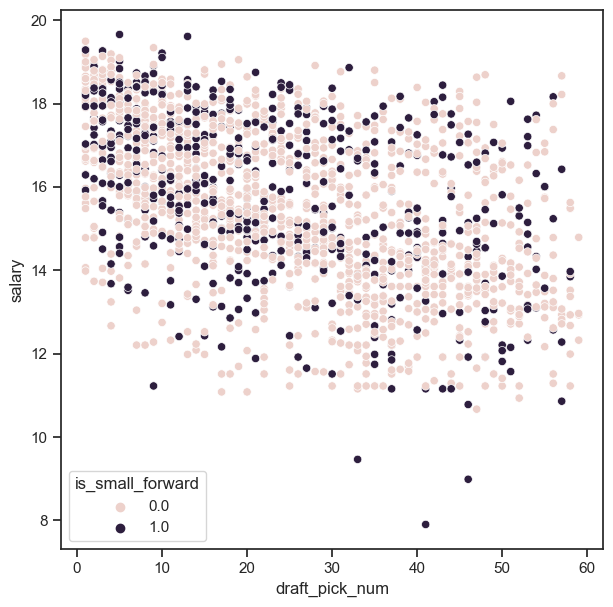

In [32]:
sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))

sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"] < 60]["draft_pick_num"], y = np.log(career_player_data["salary"]), hue = career_player_data[career_player_data["draft_pick_num"] < 60]["is_small_forward"])
plt.show()

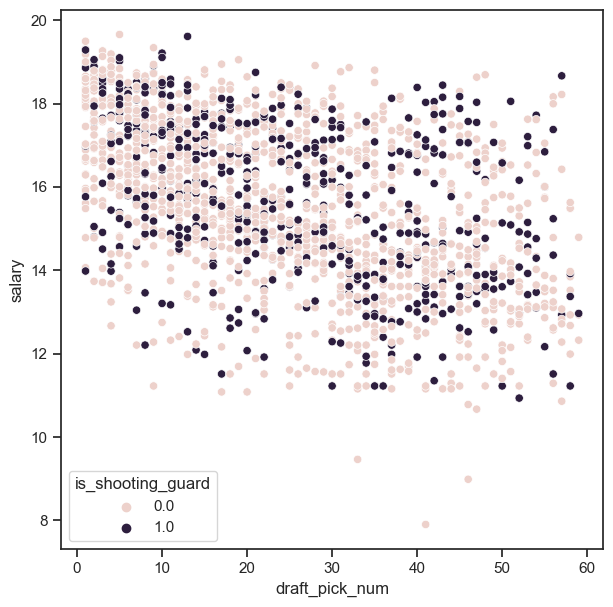

In [22]:
sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))

sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"] < 60]["draft_pick_num"], y = np.log(career_player_data["salary"]), hue = career_player_data[career_player_data["draft_pick_num"] < 60]["is_shooting_guard"])
plt.show()

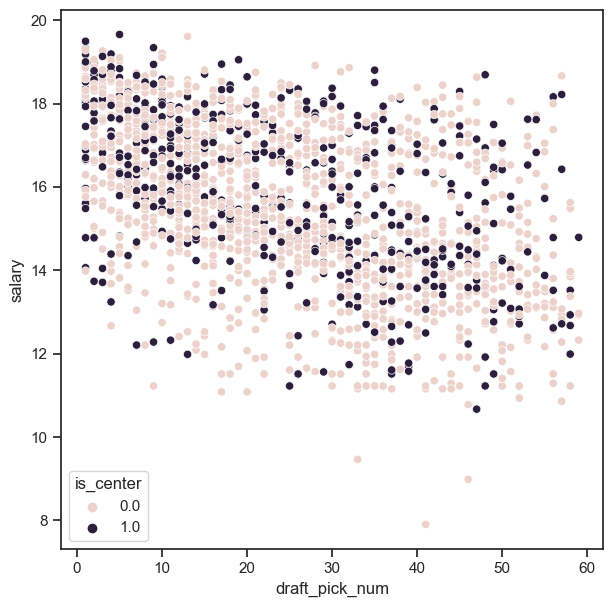

In [23]:
sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))

sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"] < 60]["draft_pick_num"], y = np.log(career_player_data["salary"]), hue = career_player_data[career_player_data["draft_pick_num"] < 60]["is_center"])
plt.show()

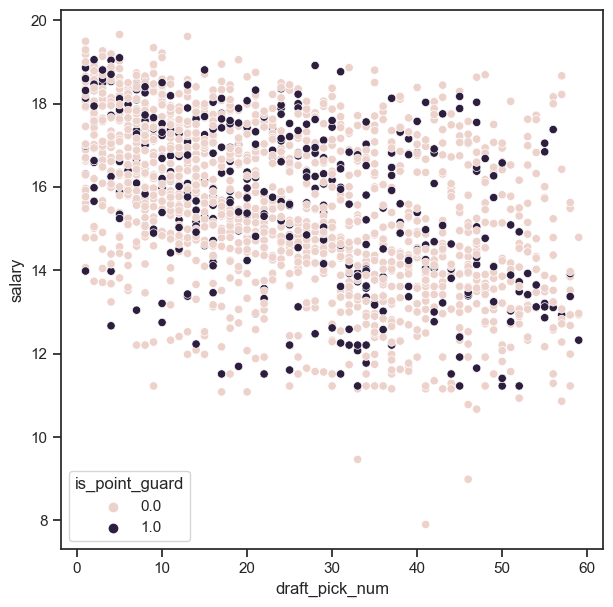

In [24]:
sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))

sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"] < 60]["draft_pick_num"], y = np.log(career_player_data["salary"]), hue = career_player_data[career_player_data["draft_pick_num"] < 60]["is_point_guard"])
plt.show()

In [25]:
# Show average salary for each position by binary position
print(career_player_data.groupby("is_power_forward")["salary"].mean())
print(career_player_data.groupby("is_small_forward")["salary"].mean())
print(career_player_data.groupby("is_shooting_guard")["salary"].mean())
print(career_player_data.groupby("is_center")["salary"].mean())
print(career_player_data.groupby("is_point_guard")["salary"].mean())

is_power_forward
False    1.581917e+07
True     2.506572e+07
Name: salary, dtype: float64
is_small_forward
False    1.689307e+07
True     2.302553e+07
Name: salary, dtype: float64
is_shooting_guard
False    1.804073e+07
True     1.991078e+07
Name: salary, dtype: float64
is_center
False    1.627348e+07
True     2.502738e+07
Name: salary, dtype: float64
is_point_guard
False    1.853037e+07
True     1.889666e+07
Name: salary, dtype: float64


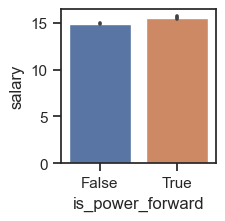

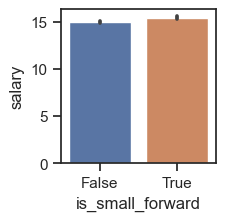

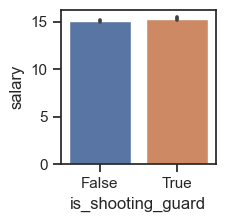

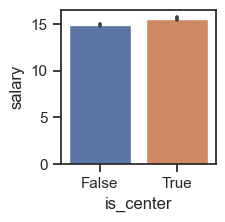

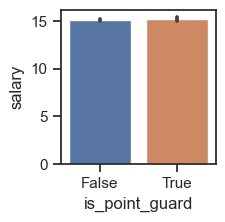

In [31]:
# make a plot for salary per position
sns.set_theme(style="ticks")

f, axes = plt.subplots(figsize=(2, 2))

sns.barplot(x = career_player_data["is_power_forward"], y = np.log(career_player_data["salary"]))
plt.show()

f, axes = plt.subplots(figsize=(2, 2))

sns.barplot(x = career_player_data["is_small_forward"], y = np.log(career_player_data["salary"]))
plt.show()

f, axes = plt.subplots(figsize=(2, 2))

sns.barplot(x = career_player_data["is_shooting_guard"], y = np.log(career_player_data["salary"]))
plt.show()

f, axes = plt.subplots(figsize=(2, 2))

sns.barplot(x = career_player_data["is_center"], y = np.log(career_player_data["salary"]))
plt.show()

f, axes = plt.subplots(figsize=(2, 2))

sns.barplot(x = career_player_data["is_point_guard"], y = np.log(career_player_data["salary"]))
plt.show()

## Regression Model

In [35]:
# Make a column for each position they played
combined_data["is_power_forward"] = combined_data["position"].str.contains("Power Forward")
combined_data["is_small_forward"] = combined_data["position"].str.contains("Small Forward")
combined_data["is_shooting_guard"] = combined_data["position"].str.contains("Shooting Guard")
combined_data["is_center"] = combined_data["position"].str.contains("Center")
combined_data["is_point_guard"] = combined_data["position"].str.contains("Point Guard")

In [36]:
combined_data.columns

Index(['index_x', '_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'index_y', 'league',
       'player_id', 'salary', 'season', 'season_end', 'season_start', 'team',
       'is_power_forward', 'is_small_forward', 'is_shooting_guard',
       'is_center', 'is_point_guard'],
      dtype='object')

In [37]:
# Create dummy variables for team
team_dummies = pd.get_dummies(combined_data["team"])

# Combine the data
combined_data = pd.concat([combined_data, team_dummies], axis=1)
combined_data.head()

,index_x,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Seattle SuperSonics,Toronto Raptors,Utah Jazz,Vancouver Grizzlies,Washington Bullets,Washington Wizards
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,True,False,False,False,False,False,False,False,False
1,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,True,False,False,False,False,False,False,False,False
2,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,False,False,False,False,False,False,False,False,False
3,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,False,False,False,False,False,False,False,False,False
4,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,False,True,False,False,False,False,False,False,False


In [38]:
# SHow types of columns

player_data.dtypes

index            int64
_id             object
birthDate       object
birthPlace      object
career_AST     float64
career_FG%      object
career_FG3%     object
career_FT%      object
career_G         int64
career_PER      object
career_PTS     float64
career_TRB      object
career_WS       object
career_eFG%     object
college         object
draft_pick      object
draft_round     object
draft_team      object
draft_year      object
height          object
highSchool      object
name            object
position        object
shoots          object
weight          object
dtype: object

In [39]:
# Convert all columns to numeric

combined_data = combined_data.apply(pd.to_numeric, errors='coerce')


In [40]:
combined_data.head()

,index_x,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Seattle SuperSonics,Toronto Raptors,Utah Jazz,Vancouver Grizzlies,Washington Bullets,Washington Wizards
0,0,NaN,NaN,NaN,0.3,50.2,0.0,70.1,256,13.0,...,False,True,False,False,False,False,False,False,False,False
1,0,NaN,NaN,NaN,0.3,50.2,0.0,70.1,256,13.0,...,False,True,False,False,False,False,False,False,False,False
2,0,NaN,NaN,NaN,0.3,50.2,0.0,70.1,256,13.0,...,False,False,False,False,False,False,False,False,False,False
3,0,NaN,NaN,NaN,0.3,50.2,0.0,70.1,256,13.0,...,False,False,False,False,False,False,False,False,False,False
4,0,NaN,NaN,NaN,0.3,50.2,0.0,70.1,256,13.0,...,False,False,True,False,False,False,False,False,False,False


In [41]:
pd.options.display.max_rows = 4000

In [42]:
# Show columns with NaN values

combined_data.isna().sum()

index_x                                  0
_id                                  14163
birthDate                            14163
birthPlace                           14163
career_AST                               0
career_FG%                              12
career_FG3%                            501
career_FT%                              89
career_G                                 0
career_PER                               3
career_PTS                               0
career_TRB                               0
career_WS                                0
career_eFG%                             12
college                              14163
draft_pick                           14163
draft_round                          14163
draft_team                           14163
draft_year                            1902
height                               14163
highSchool                           14163
name                                 14163
position                             14163
shoots     

In [43]:
# Create df with only ['season_end', 'team', 'is_power_forward', 'is_small_forward',
    #    'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
    #    'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
    #    'career_TRB', 'career_WS', 'career_eFG%',] and team_dummies

refined_data = combined_data[['salary', 'season_end', 'is_power_forward', 'is_small_forward',
         'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
         'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
         'career_TRB', 'career_WS', 'career_eFG%'] + list(team_dummies.columns)]

In [44]:
# Drop NaN values

refined_data = refined_data.dropna()

refined_data.shape

(13626, 55)

In [45]:
refined_data.head()

,salary,season_end,is_power_forward,is_small_forward,is_shooting_guard,is_center,is_point_guard,career_AST,career_FG%,career_FG3%,...,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Seattle SuperSonics,Toronto Raptors,Utah Jazz,Vancouver Grizzlies,Washington Bullets,Washington Wizards
0,395000,1991,True,False,False,False,False,0.3,50.2,0.0,...,False,True,False,False,False,False,False,False,False,False
1,494000,1992,True,False,False,False,False,0.3,50.2,0.0,...,False,True,False,False,False,False,False,False,False,False
2,500000,1993,True,False,False,False,False,0.3,50.2,0.0,...,False,False,False,False,False,False,False,False,False,False
3,805000,1994,True,False,False,False,False,0.3,50.2,0.0,...,False,False,False,False,False,False,False,False,False,False
4,650000,1995,True,False,False,False,False,0.3,50.2,0.0,...,False,False,True,False,False,False,False,False,False,False


In [84]:
from sklearn.metrics import mean_squared_error

In [49]:
# Create regression model using ['season_end', 'team', 'is_power_forward', 'is_small_forward',
    #    'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
    #    'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
    #    'career_TRB', 'career_WS', 'career_eFG%',] and team_dummies

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = refined_data[['season_end', 'is_power_forward', 'is_small_forward',
         'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
         'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
         'career_TRB', 'career_WS', 'career_eFG%',]]
y = refined_data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.4091253474842532

In [85]:
# Create regression model using ['season_end', 'team', 'is_power_forward', 'is_small_forward',
    #    'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
    #    'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
    #    'career_TRB', 'career_WS', 'career_eFG%',] and team_dummies

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = refined_data[['season_end', 'career_AST', 'career_FG%',
         'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
         'career_TRB', 'career_WS', 'career_eFG%',] + list(team_dummies.columns)]
y = refined_data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)


print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

0.42376102457222387
Root Mean Squared Error (RMSE): 3151191.4382933266


In [88]:
# Create regression model using ['season_end', 'team', 'is_power_forward', 'is_small_forward',
    #    'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
    #    'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
    #    'career_TRB', 'career_WS', 'career_eFG%',] and team_dummies

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = refined_data[['season_end', 'is_power_forward', 'is_small_forward',
         'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
         'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
         'career_TRB', 'career_WS', 'career_eFG%',] + list(team_dummies.columns)]
y = refined_data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

0.4312678246119763
Root Mean Squared Error (RMSE): 3112235.376635483


In [57]:

# Show the coefficients
coefficients = pd.DataFrame({'variable': X.columns, 'coefficient': model.coef_})
# Sort
coefficients = coefficients.sort_values('coefficient')
coefficients

,variable,coefficient
33,New Orleans Pelicans,-1.968271e+06
34,New Orleans/Oklahoma City Hornets,-1.778834e+06
24,Kansas City Kings,-1.751509e+06
22,Houston Rockets,-1.661172e+06
42,San Antonio Spurs,-1.608258e+06
39,Phoenix Suns,-1.523860e+06
14,Charlotte Bobcats,-1.509081e+06
45,Utah Jazz,-1.501504e+06
20,Detroit Pistons,-1.482629e+06
25,Los Angeles Clippers,-1.480676e+06


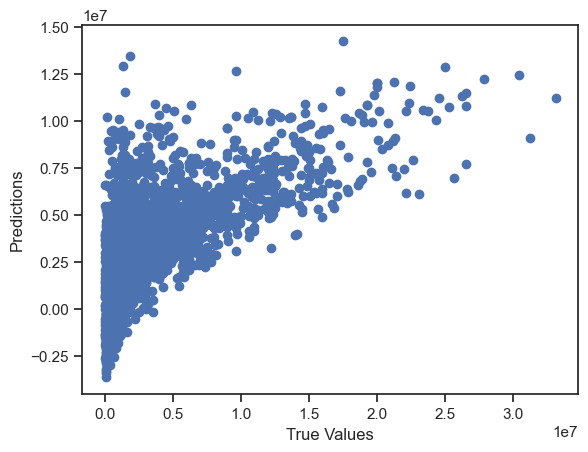

In [58]:
# Plot the points and the model

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [90]:
# Create regression model using ['season_end', 'team', 'is_power_forward', 'is_small_forward',
    #    'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
    #    'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
    #    'career_TRB', 'career_WS', 'career_eFG%',] and team_dummies

# Transform salary to log

refined_data['log_salary'] = np.log(refined_data['salary'])

X = refined_data[['season_end', 'is_power_forward', 'is_small_forward',
            'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
            'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
            'career_TRB', 'career_WS', 'career_eFG%',] + list(team_dummies.columns)]
y = refined_data['log_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


0.5263860417188806
Root Mean Squared Error (RMSE): 0.9171943731077923


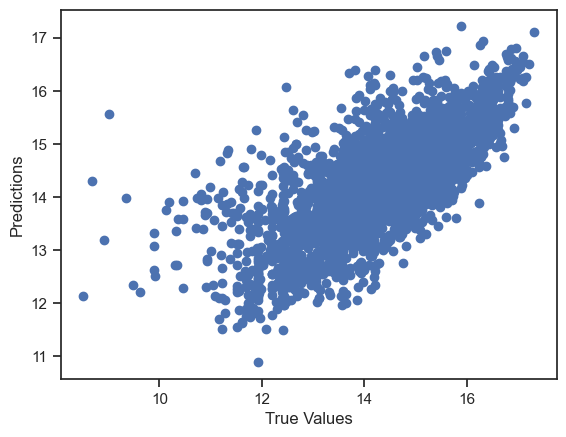

In [68]:
# Plot the points and the model

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [106]:
combined_data.columns

Index(['index_x', '_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'index_y', 'league',
       'player_id', 'salary', 'season', 'season_end', 'season_start', 'team',
       'is_power_forward', 'is_small_forward', 'is_shooting_guard',
       'is_center', 'is_point_guard', 'Atlanta Hawks', 'Boston Celtics',
       'Brooklyn Nets', 'Charlotte Bobcats', 'Charlotte Hornets',
       'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks',
       'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors',
       'Houston Rockets', 'Indiana Pacers', 'Kansas City Kings',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
  

In [118]:
from sklearn.linear_model import Lasso

# Create regression model using ['season_end', 'team', 'is_power_forward', 'is_small_forward',
    #    'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
    #    'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
    #    'career_TRB', 'career_WS', 'career_eFG%',] and team_dummies

# Transform salary to log

refined_data['log_salary'] = np.log(refined_data['salary'])

X = refined_data[['season_end', 'is_power_forward', 'is_small_forward',
            'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
            'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
            'career_TRB', 'career_WS', 'career_eFG%',] + list(team_dummies.columns)]
y = refined_data['log_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso regression model with an alpha value (regularization strength)
lasso = Lasso(alpha=10)  # You may need to tune the alpha value

# Train the Lasso regression model
lasso.fit(X_train, y_train)

# Predict the salary on the test set
y_pred = lasso.predict(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

0.5263860417188806
Root Mean Squared Error (RMSE): 1.2111922180186698


In [170]:
# SHow unique season_end

refined_data['season_end'].unique()

array([1991, 1992, 1993, 1994, 1995, 1985, 1986, 1988, 1989, 1996, 1997,
       1998, 2001, 1999, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2010, 2017, 2018, 2009, 2013, 2014, 2015, 2016, 2011, 2012, 1987,
       1990])

In [174]:
modern_data = refined_data[refined_data['season_end'] > 2000]

X = modern_data[['season_end', 'is_power_forward', 'is_small_forward', 'is_shooting_guard', 'is_center', 'is_point_guard'] + list(team_dummies.columns)]
y = modern_data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.02599284849986172